# Programming/Experimental Assignment 5 - PCA and Dimensionality Reduction

This part of the assignment will give you practice with PCA and dimensionality reduction.



For a quick review the basics of eigenvalues and eigenvectors, see
the following short webpage: 
http://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/eigen/eigen.html.

It's crucial for PCA that the covariance matrix,
is not just a square matrix, but a *symmetric* square matrix.  A matrix *A* is symmetric if $A_{ij}$ = $A_{ji}$
for every ij pair.  The eigenvectors and eigenvalues of symmetric matrices have special properties, and PCA takes advantage of these properties.

## Step 1:  Do some simple exercises by hand to practice with eigenvalues and eigenvectors
In Step 2, you'll check your answers with numpy.  You don't have to hand anything in for this step.

(a) By hand, find the characteristic polynomial of the matrix 
$A= \begin{bmatrix}
    0 & 14 \\
    6 & 9 
\end{bmatrix}$.  (Note: This is not a symmetric matrix.)

(b) By hand, solve for the eigenvalues of $A$ using the characteristic polynomial you just computed.  (Numpy uses a more efficient method to compute eigenvalues.)

(c)  Solve for the eigenvectors of $A$ using those eigenvalues.
The $L_2$ norm of your eigenvectors should be equal to 1.

(d)  Solve for the eigenvalues of the following symmetric matrix:
  $B= \begin{bmatrix}
    0 & 0\\
    0 & 0 
\end{bmatrix}$. It has two eigenvalues, but they are equal (because the characteristic polynomial has a repeated root).  
  


## Verify your Step 1 results using numpy

In [11]:

import numpy as np

A = np.array([[0,14],[6,9]])

# Running the numpy linear algebra command linalg.eig(A) that returns
# [V,D] where V is the vector of eigenvalues (including repeated ones) and D is a matrix whose columns
# are unit-length eigenvectors corresponding to the eigenvalues in V.  Numpy doesn't guarantee that the
# given eigenvectors are orthogonal, although they will be orthogonal (ignoring roundoff errors) if the
# eigenvalues are all distinct
[V,D] = np.linalg.eig(A)
print('Eigenvalues:')
print(V)
print('Eigenvectors:')
print(D)



Eigenvalues:
[-5.71028893 14.71028893]
Eigenvectors:
[[-0.9259401  -0.6894021 ]
 [ 0.37767039 -0.72437887]]


In [12]:

B = np.array([[0,0],[0,0]])

print(np.linalg.eig(B))

[V,D] = np.linalg.eig(B)
print('Eigenvalues:')
print(V)
print('Eigenvectors:')
print(D)




(array([0., 0.]), array([[1., 0.],
       [0., 1.]]))
Eigenvalues:
[0. 0.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]


## Step 2: Do a simple exercise to center the data and compute the covariance matrix.  
You don't need to hand anything in for this step.

(a) Consider the following training set, consisting of 4 unlabeled examples,
with real-valued attributes $x_1, x_2$, and $x_3$.  The training set is
represented by a matrix $X$, where each row of the matrix corresponds to an example,
and column $i$ corresponds to the $i$th attribute.
$$
\begin{bmatrix}
    5 & 2 & 6 \\
    9 & 6 & 4 \\
    7 & 1 & 0 \\
    3 & 5 & 6 
\end{bmatrix}
$$

Begin by centering the data, causing the sample mean in each dimension to be 0, as follows.
Calculate the sample means for each column $[s_1, s_2, s_3]$ by hand,
and then subtract these values from the entries in each column
(e.g. $s_3$ is subtracted from all values in column 3).
Call the resulting data matrix $S$.

(b) 
By hand, calculate the sample covariance of $x_1$ and $x_3$ in $S$.

Recall that the sample covariance of $x_i$ and $x_j$  for dataset 
a dataset with $N$ examples is
$$\frac{\sum_{t} (x_i^t - s_i)*(x_j^t - s_j)}{N-1}$$
(as in Numpy, using the version of the sample variance where you divide by $N-1$)


## Verify your Step 2 results using numpy

In [13]:

X = np.array([[5,2,6],[9,6,4],[7,1,0],[3,5,6]])
print(X.mean(axis=0))
Xcent = X - X.mean(axis=0)
print('The data matrix after centering')
print(Xcent)
print('The covariance matrix of the centered data')
#rowvar=False becasue the variables/features correspond to the columns
S = np.cov(Xcent,rowvar=False)
print(S)
# In fact, centering the data doesn't affect the covariance matrix.
# You'd get the same covariance matrix if you computed np.cov(X)
print('The covariance of x1 and x3')
# it's in entry [0,2] because of indexing of numpy arrays
print(S[0,2])

[6.  3.5 4. ]
The data matrix after centering
[[-1.  -1.5  2. ]
 [ 3.   2.5  0. ]
 [ 1.  -2.5 -4. ]
 [-3.   1.5  2. ]]
The covariance matrix of the centered data
[[ 6.66666667  0.66666667 -4.        ]
 [ 0.66666667  5.66666667  3.33333333]
 [-4.          3.33333333  8.        ]]
The covariance of x1 and x3
-4.0


## Step 3: Apply sklearn's version of PCA to the matrix X above

In [14]:
import sklearn.decomposition as skd

# .fit computes the principal components  (n_components of them)
# The columns of W are the eigenvectors of the covariance matrix of X
pca = skd.PCA(n_components = 3)
skd.PCA.fit(pca,X)
W1 = pca.components_
W = W1.transpose()
# The first column of the matrix W is a vector w of norm 1, such that 
# the projection of the data in Xcent (the centered version of X) in the direction of w has the largest
# variance possible.  
print('Eigenvectors of sample covariance matrix S, produced by numpy PCA:')
print(W)

# We get the same result by computing the eigenvectors directly, except that
# some of the eigenvectors may be multiplied by -1 (since if x is an eigenvector
# of length 1 with eigenvalue lambda, so is -x.)
print('Eigenvectors of sample covariance matrix S, computed directly')
[V,D] = np.linalg.eig(S)
print('Eigenvectors:')
print(D)

Z = pca.transform(X)
# Z is a new representation of the data in matrix X,
# using the attributes produced by PCA.
# The first column of Z 
# corresponds to the attribute associated with the principal (largest)
# eigenvalue of the sample covariance matrix.

print('Showing Z, the transformed version of data matrix X produced by PCA without any dimension reduction')
print(Z)


Eigenvectors of sample covariance matrix S, produced by numpy PCA:
[[ 0.52400642  0.65648154  0.54263179]
 [-0.34531641  0.74614542 -0.5692307 ]
 [-0.77857167  0.11090088  0.61767883]]
Eigenvectors of sample covariance matrix S, computed directly
Eigenvectors:
[[-0.52400642 -0.65648154 -0.54263179]
 [ 0.34531641 -0.74614542  0.5692307 ]
 [ 0.77857167 -0.11090088 -0.61767883]]
Showing Z, the transformed version of data matrix X produced by PCA without any dimension reduction
[[-1.56317515 -1.5538979   1.54657193]
 [ 0.70872823  3.83480816  0.20481862]
 [ 4.50158414 -1.65248553 -0.50500678]
 [-3.64713722 -0.62842473 -1.24638377]]


In [15]:
# If we wanted to do dimension reduction on X, and reduce the dimension
# of the data to 2 using PCA, we could replace X by the first 2 columns of Z
# instead of by the entire matrix Z.  
# Changing n_components to 2 in the call to skd.PCA is equivalent to removing the
# last column of our current Z.

# Repeating the above but reducing dimension to 2
pca = skd.PCA(n_components = 2)
skd.PCA.fit(pca,X)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(X)
print('Showing Z, the transformed version of data matrix X produced by PCA, reducing dimension to 2')
print(Z)


Showing Z, the transformed version of data matrix X produced by PCA, reducing dimension to 2
[[-1.56317515 -1.5538979 ]
 [ 0.70872823  3.83480816]
 [ 4.50158414 -1.65248553]
 [-3.64713722 -0.62842473]]


In [16]:
X = np.array([[9, 6, 4], [7, 1, 0], [3, 5, 6]])
# Repeating the above but reducing dimension to 2
pca = skd.PCA(n_components = 2)
skd.PCA.fit(pca,X)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(X)
print('Showing Z, the transformed version of data matrix X produced by PCA, reducing dimension to 2')
print(Z)

Showing Z, the transformed version of data matrix X produced by PCA, reducing dimension to 2
[[-0.32788581  3.38349619]
 [ 4.28209516 -1.48970353]
 [-3.95420935 -1.89379266]]


## Step 4: Understanding how you can recover an approximate version of the original dataset, after PCA
As discussed above, PCA does not just project the data, it also centers it
around the origin.  This is accomplished by computing the sample mean $m$ of the
examples (rows) in $X$, and subtracting it from each row of $X$,
prior to computing the projection.
If $x$ is the first row (example) of $X$, and $z$ is the corresponding
first row of $z$, then its first entry, $z_1$, is computed as follows: $z_1 = W^T *(x^T-m^T)$
or equivalently, $z_1 = (x-m)*W$. 

More generally, if $N$ is the number of examples (rows) in $X$, and
$M$ is the $N \times N$ matrix whose rows are all equal to $m$, we get
$Z=(X-M)*W$.

Because the columns of $W$ are orthogonal, 
and have unit length, 
$X = Z W^T + M$.

If we use PCA to reduce the dimension to $k$ attributes,
we want to use only the first $k$ principal components,
corresponding to the first $k$ columns of $W$ and $Z$.
Let $W_k$ and $Z_k$ denote the matrices consisting of
the first $k$ columns of $W$ and $Z$.
In this case, we can use the same calculation, $X=ZW^T+M$, 
but with $W_k$ and $Z_k$,
to get an approximation to X.



## Fun with PCA: Eigenfaces = Eigenvalues + Faces
Follow the instructions below.

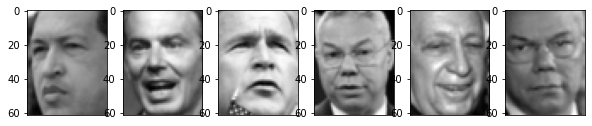

In [17]:

# The code below loads a dataset containing images of faces
# and displays some of them.  You will need to run the code
# to answer the given questions.
# (You may need to install pillow or something similar.)
#
# Each image is a 62x47 pixel array.
# The images are read into a matrix called fea.
# The rows of the matrix fea are the images (examples).
# The features (columns) are the pixels.
# Each example is represented by a vector of real numbers of length 2914,
# listing the pixels from left to right, row by row, from top to bottom.

# loading the image viewer
from PIL import Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, h, w = lfw_people.images.shape
npix = h*w
fea = lfw_people.data

def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

plt.figure(figsize=(10,20))
nplt = 6
for i in range(nplt):    
    plt.subplot(1,nplt,i+1)
    plt_face(fea[i])

plt.show()

# The above code only displays the first 4 faces in the dataset.
# You can display just the face corresponding to Example t in the dataset (starting from 0)
# by executing the following commands:
# plt_face(fea[t])
# plt.show()

There is nothing you need to hand in for Step 4.

## Step 5: Fill in the missing code below

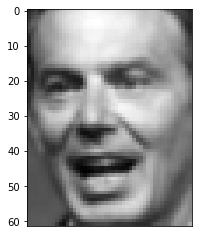

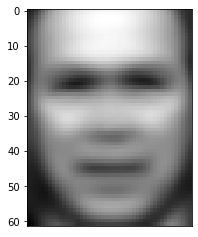

5 attribute values from PCA for image t = 1
[ 809.99756 -624.8557   365.0755   -91.26814  302.4979 ]


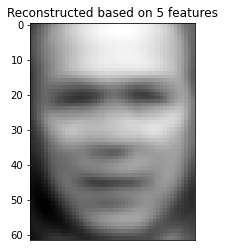

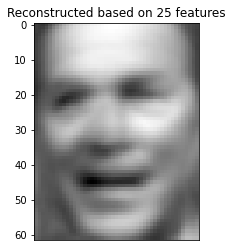

In [21]:

# (a) TO DO:  Display the second face, t=1, in the dataset using the appropriate command above.
plt_face(fea[1])
plt.show()

# (b) TO DO: Compute the mean of all the examples in the dataset fea. 
# (That is, compute an image such that each pixel i of the image is the mean of pixel i
# in all the images in fea.)
# Display it using a modification of the above command.  

fea_mean = np.zeros(fea.shape[1])

for i in range(fea.shape[0]):
    fea_mean += fea[i]
    
fea_mean = fea_mean / fea.shape[0]
plt_face(fea_mean)
plt.show()

# (c) TO DO: Let's do dimensionality reduction with pca.  Using numpy and/or sklearn,
# compute the 5 top principal components of the data matrix fea.
# Then print the associated 5 attribute values for image t=1 that would be produced
# by PCA.

pca = skd.PCA(n_components = 5)
skd.PCA.fit(pca,fea)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(fea)
print('5 attribute values from PCA for image t = 1')
print(Z[1])


# (d) TO DO: Using the reconstruction equation X=W^T*Z+M described above, but
# with just the first 5 columns of Z and W (the attributes associated with the first 5 principal
# components), approximate the image t=1 in the dataset.
# Display the resulting approximate image.
# Repeat with the first 25 columns of Z and W.
# (These will be representations of image t=1, based on 5 or 25 features instead of the
# original 2914 pixel features.)


X_recon = Z.dot(W.transpose()) + fea_mean
plt_face(X_recon[1])
plt.title('Reconstructed based on 5 features')
plt.show()

pca = skd.PCA(n_components = 25)
skd.PCA.fit(pca,fea)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(fea)
X_recon = Z.dot(W.transpose()) + fea_mean
plt_face(X_recon[1])
plt.title('Reconstructed based on 25 features')
plt.show()


## Step 6:  Dimensionality reduction for sentiment analysis
In image data, features are pixels.  Now we return to the sentiment analysis dataset we explored in a previous homework.  In that homework, we applied multinomial Naive Bayes after creating a data matrix whose rows corresponded
to the reviews.  In this homework, we want to apply logistic regression instead.  However,
the features in this problem are the words in the vocabulary, and there are many of them.
Using dimensionality reduction seems like it might be a good idea here, so let's try a couple of ways of doing that.

In [22]:
# begin by creating the data matrix and target vector, as in the previous homework
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# read in train and test files, removing newlines

f = open("trainfilex.txt", "r")
trainrevs = [line.rstrip('\n') for line in f]

f = open("trainfiley.txt","r")
trainlabels = [line.rstrip('\n') for line in f]

f = open("testfilex.txt","r")
testrevs = [line.rstrip('\n') for line in f]

f = open("testfiley.txt","r")
testlabels = [line.rstrip('\n') for line in f]

# the first part of the training file contains all the
# negative training reviews, and the second part contains all the positive
# training reviews
#
# create an instance of CountVectorizer
# Note there are issues with the way CountVectorizer removes stop words.  To learn more: https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
#vectorizer = CountVectorizer(stop_words='english')
vectorizer = CountVectorizer()

# Create the vocabulary for our feature transformation
vectorizer.fit(trainrevs)

# Next we create the feature vectors for the training data
X_train = vectorizer.transform(trainrevs).toarray() # code to turn the training reviews into a feature vector
X_test = vectorizer.transform(testrevs).toarray() # code to turn the test reviews into a feature vector


In [23]:
# How many features are there in the data matrix X_train?
# TODO: Write a line of code to answer this question

print('Features in X_train: ', X_train.shape[1])
X_train.shape

Features in X_train:  5308


(1349, 5308)

# Step 7 Feature selection using Gini Impurity
We will use a "filter"
method for feature selection, based on Gini impurity.  First, we create a "binarized" version of the training data matrix, so that
entry [i,j] contains a 1 if word j appears in review i, and entry [i,j] contains a
0 otherwise.  That is, if a word occurs more than once in a review, we only count it
once. Now we can treat each feature as a binary feature.
Using the binarized version of the training data matrix, and the target vector,
we will compute the following "weighted Gini impurity" measure for each word j:
$$\frac{|S_l|}{|S|}G(S_l)+\frac{|S_r|}{|S|}G(S_r)$$ where $S$ is the set of examples (reviews) with their binary labels,
$S_l$ is the subset of examples for which the value of feature $j$=0,
$S_r$ is the subset of examples for which the value of feature $j$=0,
and $G$ is the Gini impurity function $G(S) = \sum_{c} p_c(1-p_c)$ where $p_c$ is the fraction of examples in $S$ belonging to class $c$ (here $c=0$ or $c=1$).

If we want only k features, we will choose the k features with **lowest** weighted Gini impurity.


In [24]:
#  We begin by binarizing the training data matrix
# Create a lambda function that returns 1 for positive inputs, 0 otherwise
positive_check = lambda i: 1 if i > 0 else 0

# Create a vectorized version of lambda function
vectorized_positive_check = np.vectorize(positive_check)

# apply vectorized function to all elements of X_train to "binarize" the matrix 
X_train_binarized = vectorized_positive_check(X_train)

## Compute the weighted Gini impurity
Start by writing a helper function that takes as input a data matrix X
with binary entries, an associated binary target vector y, and an index j
It returns the weighted Gini impurity of j with respect to X and y, as
defined above.

In [25]:
#S_l is subset of examples which the value of feature j = 0
#S_r is subset of examples which the value of feature j = 1

# Input: Binary data matrix X, binary target vector y, column index j
# Output: Weighted Gini impurity of feature j in dataset represented by X and y
# as defined above

def wtdGini(X,y,j): #TYPO wtdGini(X,y,i), CHANGED i to j
########## TO DO ##########

    S_l, S_r = 0, 0
    S_l_0, S_l_1, S_r_0, S_r_1 = 0, 0, 0, 0
    
    for i in range(len(X)):
        
        if X[i][j] == 0:
            S_l += 1
            if int(y[i]) == 0:
                S_l_0 += 1
            else:
                S_l_1 += 1
        
        else:
            S_r += 1
            if int(y[i]) == 0:
                S_r_0 += 1
            else:
                S_r_1 += 1
    #prob Sl and Sr       
    pSl, pSr = S_l / len(X), S_r / len(X) 

    
    #prob class 0 or 1 given Sl or Sr
    S_l_0, S_l_1, S_r_0, S_r_1 = S_l_0 / S_l, S_l_1 / S_l, S_r_0 / S_r, S_r_1 / S_r
    
    #gini impurity function
    G_l = S_l_0 * (1 - S_l_0) + S_l_1 * (1 - S_l_1)
    G_r = S_r_0 * (1 - S_r_0) + S_r_1 * (1 - S_r_1)
    
    #weighted gini
    stdGini = pSl * G_l + pSr * G_r

##########
    return stdGini

In [26]:
# If you want to know which "word" in the vocabulary corresponds to column j in X_train,
# it's easy to find out from the vocabulary dictionary built by CountVectorizer.  
# Here we find the attribute for column 4710
i=vectorizer.vocabulary_
listOfKeys = [key  for (key, value) in i.items() if value == 4710]
print(listOfKeys)

['thoughtful']


Write code to create a vector of indices j, in increasing order of the weighted Gini impurity of the corresponding features.
Calculate the weighted Gini impurity with respect to X_train_binarized and trainlabels.

In [27]:
########### TO DO #############

weighted_Gini = np.zeros(len(X_train_binarized[0]))

for j in range(len(X_train_binarized[0])):

    weighted_Gini[j] = wtdGini(X_train_binarized, trainlabels, j)


###############################

Now write code to print the 10 words with the lowest weighted Gini impurity, along with their weighted Gini impurity

In [28]:
############## TO DO #####################

#return kth lowest index positions in sorted order of weighted Gini values
def kth_lowest_Gini(kth_lowest, weighted_Gini):
    
    k = np.arange(kth_lowest) + 1
    idx = np.argpartition(weighted_Gini, k)
    lowest = idx[:kth_lowest]
    return lowest

#10 lowest gini impurities and words
lowest = kth_lowest_Gini(10, weighted_Gini)

i=vectorizer.vocabulary_

for j in range(len(lowest)):
    
    for key, value in i.items():
        if value == lowest[j]:
            word = key  
    print(j + 1, ': ', word, " ", weighted_Gini[lowest[j]])


###########################################

1 :  bad   0.48260059288603196
2 :  best   0.48582732519089356
3 :  and   0.4874786280665139
4 :  moving   0.4900866928394984
5 :  with   0.49071490171177545
6 :  too   0.4907856200614566
7 :  or   0.4909836448754165
8 :  dull   0.49132579409977867
9 :  minutes   0.49132579409977867
10 :  this   0.4913975127718794


Using sklearn's logistic regression, we can run it on X_train,trainlabels to compute the training error when using all the features. (Note: we are using X_train, not the binarized version.  We only used the binarized version for Gini impurity.)  

In [31]:
# By default, sklearn's logistic regression performs regularization using an
# L2 penalty term (like the one in (linear) ridge regression).  So that we're not experimenting 
# with too many different options at once, we will turn off the regularization here by setting 
# penalty=none.

# If you get an error message saying STOP: TOTAL NO. of ITERATIONS REACHED LIMIT,
# then the procedure to optimize the error function 
# did not coverge within max_iter iterations.  The default for max_iter is 100.  To 
# raise max_iter, add e.g., maxiter = 500 to the argument list for LogisticRegression().

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none',max_iter = 500).fit(X_train, trainlabels)
print("Training accuracy:")
print(clf.score(X_train,trainlabels))
print("Test accuracy:")
print(clf.score(X_test, testlabels))

Training accuracy:
1.0
Test accuracy:
0.7947019867549668


Now run sklearn's logistic regression on the data in X_train,trainlabels and test on the test data, using just 
the k features with lowest weighted Gini impurity, for k=10,50, 100, 250, 500, 750, 1000.  Use sklearn's version of logistic regression.  So, you will need to run logistic regression on the training set 5 times. You may need to increase the max_iter parameter to the LogisticRegression function in sklearn, as described above.

In [47]:
 ########## TO DO ###########

k = np.array([10, 50, 100, 250, 500, 750, 1000])

for i in range(len(k)):
    
    lowest = kth_lowest_Gini(k[i], weighted_Gini)
    X_train_fea = X_train[:,lowest]
    X_test_fea = X_test[:,lowest]
    clf = LogisticRegression(penalty='none',max_iter = 500).fit(X_train_fea, trainlabels)
    print(k[i], " lowest features")
    print("Training accuracy:")
    print(clf.score(X_train_fea,trainlabels))
    print("Test accuracy:")
    print(clf.score(X_test_fea, testlabels))
    print()
    
 ###########################

10  lowest features
Training accuracy:
0.6323202372127502
Test accuracy:
0.5562913907284768

50  lowest features
Training accuracy:
0.7464788732394366
Test accuracy:
0.7483443708609272

100  lowest features
Training accuracy:
0.810229799851742
Test accuracy:
0.7682119205298014

250  lowest features
Training accuracy:
0.8999258710155671
Test accuracy:
0.7152317880794702



/Users/marcus/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


500  lowest features
Training accuracy:
0.9518161601186064
Test accuracy:
0.7947019867549668

750  lowest features
Training accuracy:
0.9673832468495182
Test accuracy:
0.7814569536423841

1000  lowest features
Training accuracy:
0.9873980726464048
Test accuracy:
0.8145695364238411



## Step 8 Experimental comparison to dimensionality reduction with PCA

It's also possible to use PCA on the sentiment analysis dataset in order to reduce the dimension to k.  (Note that this does not correspond to keeping just k words from the vocabulary vocabulary.)  Repeat the previous experiment on the sentiment analysis dataset, but this time, 
use sklearn's PCA to do dimensionality reduction (as you did with the faces), rather than feature selection based on Gini impurity.  Again, compute training and test accuracy for k=10,50, 100, 500, 1000.

In [46]:
########## TO DO ###########

k = np.array([10, 50, 100, 500, 1000])

for i in range(len(k)):
    
    pca = skd.PCA(n_components = k[i])
    skd.PCA.fit(pca,X_train)
    W1 = pca.components_
    W = W1.transpose()
    Z_train = pca.transform(X_train)
    Z_test = pca.transform(X_test)

    clf = LogisticRegression(penalty='none',max_iter = 500).fit(Z_train, trainlabels)
    print(k[i], " lowest features")
    print("Training accuracy:")
    print(clf.score(Z_train,trainlabels))
    print("Test accuracy:")
    print(clf.score(Z_test, testlabels))
    print()

############################

10  lowest features
Training accuracy:
0.6174944403261675
Test accuracy:
0.5827814569536424

50  lowest features
Training accuracy:
0.7027427724240178
Test accuracy:
0.6225165562913907

100  lowest features
Training accuracy:
0.765011119347665
Test accuracy:
0.6887417218543046

500  lowest features
Training accuracy:
1.0
Test accuracy:
0.7350993377483444

1000  lowest features
Training accuracy:
1.0
Test accuracy:
0.7748344370860927



In [48]:
Z_test

array([[ 5.68868265e-01,  1.44054701e+00, -3.25238497e-01, ...,
        -1.04430580e-01,  1.02501479e-02, -3.57002935e-02],
       [ 1.44145318e+00,  1.23326433e+00, -4.65592857e-01, ...,
        -7.06833940e-03,  2.14291929e-02, -2.72138421e-03],
       [ 2.84815947e+00,  1.06386539e+00, -1.35749945e+00, ...,
         2.03132683e-02, -9.95270174e-02, -2.72095288e-03],
       ...,
       [-1.21459562e+00, -5.31566564e-01,  1.28965009e-01, ...,
         1.36801884e-02,  2.95574358e-02,  2.75301578e-03],
       [-8.19891102e-01, -4.50908867e-01, -3.52079729e-01, ...,
         5.18445458e-02, -3.00591499e-02,  2.12831709e-02],
       [-1.21337058e+00, -5.39574043e-01,  1.33010456e-01, ...,
        -2.66283718e-02,  1.40523215e-02,  1.17565073e-02]])